**Rio de Janeiro, 27 de Junho de 2016**

Grupo: **Carlos Mattoso** (🎂) _[ **1210553** ]_ e **Gabriel Siqueira** _[ **1210689** ]_

Disciplina: **INF1335 - Introdução a Data Science com R e Python**

# A5 - Rede de Citações

## _Setup_ Básico

In [28]:
options(repr.plot.width = 10)
options(repr.plot.height = 5)

load.lib <- function(lib.name, rep="https://cloud.r-project.org/") {
    if (!require(lib.name, character.only=T))
        install.packages(lib.name, repos=rep)
    library(lib.name, character.only=T)
}
load.lib("data.table")
load.lib("knitr")
load.lib("ggplot2")

printf <- function(...) invisible(cat(paste(sprintf(...), "\n", sep=""))) # source: http://stackoverflow.com/a/13023329
# Usage example: print("%s %d", Number, 5)

dir.create("data", showWarnings = FALSE)

# Baixa os dados da pasta HCI do github para uma pasta local `data`
github.base.url = "https://raw.githubusercontent.com/calmattoso/INF1335/master/A5/ihc/" 
file.names = c("artigo", "autor", "instituicao", "keyword", "pessoa", "referencia")
for (file.name in file.names) {
    file.name.extension = paste(file.name, ".csv", sep="")
    file.path = paste("data/", file.name.extension, sep="")
    if (!file.exists(file.path))    
        download.file(paste(github.base.url, file.name.extension, sep=""), destfile=file.path, method="curl")
}
 
# Show user message indicating that different results might be observed if R version is less than 3.2.2
r.version = R.Version()
if (r.version$major < "3") {
    print("This notebook was develop under R major version 3. If your machine runs a version below 3, abnormal behavior should be expected.")
} else if (paste(r.version$major, r.version$minor, sep="") < "3.2.2") {
    print("This notebook was developed under R version 3.2.2.  If your machine runs a version below this, small differences could occur.")
}

## Leitura Inicial dos Dados

In [2]:
data.map = list()
for (file.name in file.names) {
    file.name.extension = paste(file.name, ".csv", sep="")
    file.path = paste("data/", file.name.extension, sep="")
    
    # Read strings as strings due to the nature of the files. This can be fixed on a case by case basis later
    if (file.exists(file.path))    
        data.map[[file.name]] = read.csv(file.path, fileEncoding="UTF-8", stringsAsFactor=F)
}
summary(data.map)

            Length Class      Mode
artigo      8      data.frame list
autor       7      data.frame list
instituicao 6      data.frame list
keyword     3      data.frame list
pessoa      3      data.frame list
referencia  9      data.frame list

## Examinação dos Dados

### Funções Auxiliares

In [3]:
# Exibe algumas estatísticas de atributos do tipo "character"
explore.text.attr <- function(attr.data, attr.name) {
    if (typeof(attr.data) == "character") {
        printf("Análise Exploratória de `%s`", attr.name)
        printf("  Número de valores distintos e total: %d/%d", 
               length(unique(attr.data)), length(attr.data))

        printf("  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): %d (%%%.2f)", 
               sum(attr.data != ""), sum(attr.data != "")/length(attr.data)*100.0)
        
        random.attr.sample = sample(attr.data[attr.data != ""], 5, replace=T)
        printf("  Amostra de instâncias de `%s`:", attr.name)
        printf("    %s", random.attr.sample)
        printf("")
    }
}

# Executa a exploração básica de uma base de dados
explore.dataset <- function(dataset.name) {
    dataset = data.map[[dataset.name]]

    # Exploração dos atributos de tipo "char" da base de dados
    for (attr.name in names(dataset)) {
        explore.text.attr(dataset[[attr.name]], attr.name)
    }
    
    dataset
}

### _artigo.csv_

Utilizemos as funções `str` e `summary` para entender a forma dos dados lidos e se seus tipos são apropriados. Além disso, exibem-se algumas estatísticas sobre atributos textuais, a fim de determinar o melhor tipo para representá-los e detecção de valores faltantes (_missing values_).

In [4]:
dataset.name = "artigo"
str(data.map[[dataset.name]])
summary(data.map[[dataset.name]])
head(data.map[[dataset.name]])
tail(data.map[[dataset.name]])
artigo = explore.dataset(dataset.name)

'data.frame':	340 obs. of  8 variables:
 $ id_artigo    : int  4506 4507 4508 4509 4510 4511 4512 4513 4514 4515 ...
 $ ano          : int  1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 ...
 $ titulo       : chr  "Uma Abordagem Semiótica à Análise de Interfaces: um estudo de caso" "Knowledge and Communication Perspectives in Extensible Applications" "Uma Abordagem Ergonômica para o Desenvolvimento de Sistemas Interativos" "Estudo de Interação para um Sistema de Ensino à Distância Baseado em Interfaces de Realidade Virtual" ...
 $ idioma       : chr  "PT-BR" "EN" "PT-BR" "PT-BR" ...
 $ tema         : chr  "" "" "" "" ...
 $ acm_chave    : chr  "" "" "" "" ...
 $ acm_categoria: chr  "" "" "" "" ...
 $ acm_termos   : chr  "" "" "" "" ...


   id_artigo         ano          titulo             idioma         
 Min.   :4506   Min.   :1998   Length:340         Length:340        
 1st Qu.:4591   1st Qu.:2002   Class :character   Class :character  
 Median :4676   Median :2010   Mode  :character   Mode  :character  
 Mean   :4677   Mean   :2008                                        
 3rd Qu.:4760   3rd Qu.:2013                                        
 Max.   :4854   Max.   :2015                                        
     tema            acm_chave         acm_categoria       acm_termos       
 Length:340         Length:340         Length:340         Length:340        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                       

,id_artigo,ano,titulo,idioma,tema,acm_chave,acm_categoria,acm_termos
1,4506,1998,Uma Abordagem Semiótica à Análise de Interfaces: um estudo de caso,PT-BR,,,,
2,4507,1998,Knowledge and Communication Perspectives in Extensible Applications,EN,,,,
3,4508,1998,Uma Abordagem Ergonômica para o Desenvolvimento de Sistemas Interativos,PT-BR,,,,
4,4509,1998,Estudo de Interação para um Sistema de Ensino à Distância Baseado em Interfaces de Realidade Virtual,PT-BR,,,,
5,4510,1998,APIS: Método para Desenvolvimento de Interfaces Homem-Computador em Sistemas de Segurança Visando a Confiabilidade Humana,PT-BR,,,,
6,4511,1998,"Interação, Interfaces e Instrumentos em Música Eletroacústica",PT-BR,,,,


,id_artigo,ano,titulo,idioma,tema,acm_chave,acm_categoria,acm_termos
335,4849,2015,O Pensamento Computacional Através de Jogos Infantis,PT-BR,education and hci,H.5.2. User Interfaces.,,
336,4850,2015,Investigating Treemap Visualization in Inverted Scale,EN,information visualization,H.5.2. User Interfaces: Evaluation/Methodology,,
337,4851,2015,Visualization Mechanisms for Crowdsourcing Information in Emergency Coordination,EN,information visualization,H.4.2 Information system applications: Types of Systems— decision support,,
338,4852,2015,Eye Jam: A Gaze-Controlled Musical Interface,EN,interaction with new devices,"H.5.2 User Interfaces: Interaction styles, theory and methods, I.3.6 Methodology and Techniques: Int",,
339,4853,2015,Identifying Cognitive Authority in Social Networks: a conceptual framework,EN,social interaction,H.5 Information Interfaces and Presentation: General,,
340,4854,2015,Interaction Design Process for Healthcare Professionals: formalizing user's contexts observations,EN,design and evaluation,H.5.2. User interface,,


Análise Exploratória de `titulo`
  Número de valores distintos e total: 340/340
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 340 (%100.00)
  Amostra de instâncias de `titulo`:
    Investigating the Case-based Reasoning Process During HCI Design
     Com que cor eu vou? Um estudo sobre cores e emoções na Interação Humano-Computador
     Uso de Design Probes no Design de Tecnologias para Terapeutas de Crianças com Autismo
     Can the teaching of HCI contribute for the learning of Computer Science? The case of Semiotic Engineering methods
     Estudo de Interação para um Sistema de Ensino à Distância Baseado em Interfaces de Realidade Virtual

Análise Exploratória de `idioma`
  Número de valores distintos e total: 5/340
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 340 (%100.00)
  Amostra de instâncias de `idioma`:
    EN
     PT-BR
     EN
     PT-BR
     PT-BR

Análise Exploratória de `tema`
  Número de valores distintos e total: 40/340
  Qu

Observa-se que os atributos _acm_ tem bastante dados faltantes, pecando a base então em capturar sua informação. Contudo, seu tipo ser _character_ faz sentido. Por outro lado, o atributo _idioma_ define um conjunto restrito de línguas, sendo então razoável atualizar seu tipo para _factor_. Os demais atributos não apresentam valores faltantes, o que é sempre agradável de se ver.

In [5]:
artigo$idioma = as.factor(artigo$idioma)
summary(artigo$idioma)

EN    ES  P-BR PT-BR PT-PT 
  108     2     1   228     1

Aqui já se observa uma oportunidade de limpar nossos dados. Existem duas classificações para o idioma Português do Brasil, `P-BR` e `PT-BR`, o que deve ser um erro. Há ainda uma instância discriminada a Português de Portugual (`PT-PT`). Optamos por fundir estes três tipos simplesmente como `PT`, seguindo a forma das demais classificações de idiomas da base, `EN` para inglês e `ES` para espanhol.

In [6]:
artigo$idioma = as.character(artigo$idioma)
artigo$idioma[artigo$idioma == "P-BR" | artigo$idioma == "PT-PT" | artigo$idioma == "PT-BR"] = "PT"
artigo$idioma = as.factor(artigo$idioma)
summary(artigo$idioma)

EN  ES  PT 
108   2 230

Apresenta-se abaixo o `summary` e `str` do resultado da limpeza da base _artigo.csv_:

In [7]:
data.map[["artigo"]] = artigo
summary(data.map[["artigo"]])
str(data.map[["artigo"]])

   id_artigo         ano          titulo          idioma       tema          
 Min.   :4506   Min.   :1998   Length:340         EN:108   Length:340        
 1st Qu.:4591   1st Qu.:2002   Class :character   ES:  2   Class :character  
 Median :4676   Median :2010   Mode  :character   PT:230   Mode  :character  
 Mean   :4677   Mean   :2008                                                 
 3rd Qu.:4760   3rd Qu.:2013                                                 
 Max.   :4854   Max.   :2015                                                 
  acm_chave         acm_categoria       acm_termos       
 Length:340         Length:340         Length:340        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

'data.frame':	340 obs. of  8 variables:
 $ id_artigo    : int  4506 4507 4508 4509 4510 4511 4512 4513 4514 4515 ...
 $ ano          : int  1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 ...
 $ titulo       : chr  "Uma Abordagem Semiótica à Análise de Interfaces: um estudo de caso" "Knowledge and Communication Perspectives in Extensible Applications" "Uma Abordagem Ergonômica para o Desenvolvimento de Sistemas Interativos" "Estudo de Interação para um Sistema de Ensino à Distância Baseado em Interfaces de Realidade Virtual" ...
 $ idioma       : Factor w/ 3 levels "EN","ES","PT": 3 1 3 3 3 3 3 3 3 3 ...
 $ tema         : chr  "" "" "" "" ...
 $ acm_chave    : chr  "" "" "" "" ...
 $ acm_categoria: chr  "" "" "" "" ...
 $ acm_termos   : chr  "" "" "" "" ...


### _autor.csv_ 


In [8]:
dataset.name = "autor"
str(data.map[[dataset.name]])
summary(data.map[[dataset.name]])
head(data.map[[dataset.name]])
tail(data.map[[dataset.name]])
autor = explore.dataset(dataset.name)

'data.frame':	1054 obs. of  7 variables:
 $ id_autor             : int  2 1 1 3 4 5 6 7 7 8 ...
 $ id_artigo            : int  4607 4533 4556 4831 4602 4822 4604 4556 4533 4654 ...
 $ id_pessoa            : int  1 1 1 2 3 4 5 6 6 7 ...
 $ id_instituicao       : int  74 112 111 14 66 231 87 83 83 130 ...
 $ instituicao_principal: chr  "S" "S" "S" "S" ...
 $ nome                 : chr  "Adéle Malta Pontes" "Adéle Malta Pontes" "Adéle Malta Pontes" "Adriana Euflasino" ...
 $ email                : chr  "adele@inf.puc-rio.br" "Deli@atlas.ucpel.tche.br" "Deli@atlas.ucpel.tche.br" "adrianaeuflasino@cpfl.com.br" ...


    id_autor       id_artigo      id_pessoa     id_instituicao 
 Min.   :  1.0   Min.   :4506   Min.   :  1.0   Min.   :  1.0  
 1st Qu.:177.0   1st Qu.:4595   1st Qu.:157.0   1st Qu.: 86.0  
 Median :358.5   Median :4682   Median :320.5   Median :167.0  
 Mean   :345.5   Mean   :4681   Mean   :307.0   Mean   :158.5  
 3rd Qu.:505.8   3rd Qu.:4767   3rd Qu.:451.8   3rd Qu.:219.0  
 Max.   :659.0   Max.   :4854   Max.   :579.0   Max.   :292.0  
 instituicao_principal     nome              email          
 Length:1054           Length:1054        Length:1054       
 Class :character      Class :character   Class :character  
 Mode  :character      Mode  :character   Mode  :character  
                                                            
                                                            
                                                            

,id_autor,id_artigo,id_pessoa,id_instituicao,instituicao_principal,nome,email
1,2,4607,1,74,S,Adéle Malta Pontes,adele@inf.puc-rio.br
2,1,4533,1,112,S,Adéle Malta Pontes,Deli@atlas.ucpel.tche.br
3,1,4556,1,111,S,Adéle Malta Pontes,Deli@atlas.ucpel.tche.br
4,3,4831,2,14,S,Adriana Euflasino,adrianaeuflasino@cpfl.com.br
5,4,4602,3,66,S,Adriana Holtz Betiol,abetiol@netpar.com.br
6,5,4822,4,231,S,Adriana Lopes,adriana@icomp.ufam.edu.br


,id_autor,id_artigo,id_pessoa,id_instituicao,instituicao_principal,nome,email
1049,654,4697,574,2,S,Wander Antunes Gaspar Valente,wandergaspar@gmail.com
1050,655,4545,575,213,S,Wellington B. do Nascimento Jr.,wess@eps.ufsc.br
1051,656,4700,576,39,S,William J. Giraldo,aaaa@aaaa.aaa.aaa
1052,657,4778,577,232,S,Williamson Silva,williamson.silva@icomp.ufam.edu.br
1053,658,4787,578,57,S,Yngve Sundblad,y@kth.se
1054,659,4633,579,101,S,Yulia Ostróvskaya,yuliaa.ostrovskaya@udlap.mx


Análise Exploratória de `instituicao_principal`
  Número de valores distintos e total: 2/1054
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 1054 (%100.00)
  Amostra de instâncias de `instituicao_principal`:
    S
     S
     S
     S
     S

Análise Exploratória de `nome`
  Número de valores distintos e total: 579/1054
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 1054 (%100.00)
  Amostra de instâncias de `nome`:
    Shirley Gois Barreto
     Ana I. Grimaldo-Martínez
     Simone D. J. Barbosa
     Elizabeth Furtado
     Plínio Thomaz Aquino Junior

Análise Exploratória de `email`
  Número de valores distintos e total: 622/1054
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 1048 (%99.43)
  Amostra de instâncias de `email`:
    clarisse@inf.puc-rio.br
     clarisse@inf.puc-rio.br
     le.guarino@gmail.com
     elizabet@unifor.br
     clarisse@inf.pucrio.br



Aqui não se observa a ausência de valores. O único ajuste válido é alterar o tipo da variável `instituicao_principal` para `factor`, visto que ela indica `Sim` ou `Não` para se a instituição referenciada é principal ou não.

In [9]:
autor$instituicao_principal = as.factor(autor$instituicao_principal)
data.map[[dataset.name]] = autor
summary(data.map[[dataset.name]])
str(data.map[[dataset.name]])

    id_autor       id_artigo      id_pessoa     id_instituicao 
 Min.   :  1.0   Min.   :4506   Min.   :  1.0   Min.   :  1.0  
 1st Qu.:177.0   1st Qu.:4595   1st Qu.:157.0   1st Qu.: 86.0  
 Median :358.5   Median :4682   Median :320.5   Median :167.0  
 Mean   :345.5   Mean   :4681   Mean   :307.0   Mean   :158.5  
 3rd Qu.:505.8   3rd Qu.:4767   3rd Qu.:451.8   3rd Qu.:219.0  
 Max.   :659.0   Max.   :4854   Max.   :579.0   Max.   :292.0  
 instituicao_principal     nome              email          
 N:  46                Length:1054        Length:1054       
 S:1008                Class :character   Class :character  
                       Mode  :character   Mode  :character  
                                                            
                                                            
                                                            

'data.frame':	1054 obs. of  7 variables:
 $ id_autor             : int  2 1 1 3 4 5 6 7 7 8 ...
 $ id_artigo            : int  4607 4533 4556 4831 4602 4822 4604 4556 4533 4654 ...
 $ id_pessoa            : int  1 1 1 2 3 4 5 6 6 7 ...
 $ id_instituicao       : int  74 112 111 14 66 231 87 83 83 130 ...
 $ instituicao_principal: Factor w/ 2 levels "N","S": 2 2 2 2 2 2 2 2 2 2 ...
 $ nome                 : chr  "Adéle Malta Pontes" "Adéle Malta Pontes" "Adéle Malta Pontes" "Adriana Euflasino" ...
 $ email                : chr  "adele@inf.puc-rio.br" "Deli@atlas.ucpel.tche.br" "Deli@atlas.ucpel.tche.br" "adrianaeuflasino@cpfl.com.br" ...


### _instituicao.csv_ 

In [10]:
dataset.name = "instituicao"
str(data.map[[dataset.name]])
summary(data.map[[dataset.name]])
head(data.map[[dataset.name]])
tail(data.map[[dataset.name]])
instituicao = explore.dataset(dataset.name)

'data.frame':	292 obs. of  6 variables:
 $ id_instituicao: int  74 112 111 14 66 231 87 83 130 121 ...
 $ instituicao   : chr  "Pontifícia Universidade Católica do Rio de Janeiro" "Universidade Católica de Pelotas" "Universidade Católica de Pelotas" "Companhia Paulista de Força e Luz Paulista" ...
 $ sigla         : chr  "PUC-Rio" "UCPEL" "UCPel" "CPFL" ...
 $ departamento  : chr  "Depto de Informática" "" "" "" ...
 $ estado        : chr  "RJ" "RS" "RS" "SP" ...
 $ pais          : chr  "Brasil" "Brasil" "Brasil" "Brasil" ...


 id_instituicao   instituicao           sigla           departamento      
 Min.   :  1.00   Length:292         Length:292         Length:292        
 1st Qu.: 73.75   Class :character   Class :character   Class :character  
 Median :146.50   Mode  :character   Mode  :character   Mode  :character  
 Mean   :146.50                                                           
 3rd Qu.:219.25                                                           
 Max.   :292.00                                                           
    estado              pais          
 Length:292         Length:292        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

,id_instituicao,instituicao,sigla,departamento,estado,pais
1,74,Pontifícia Universidade Católica do Rio de Janeiro,PUC-Rio,Depto de Informática,RJ,Brasil
2,112,Universidade Católica de Pelotas,UCPEL,,RS,Brasil
3,111,Universidade Católica de Pelotas,UCPel,,RS,Brasil
4,14,Companhia Paulista de Força e Luz Paulista,CPFL,,SP,Brasil
5,66,Pontifícia Universidade Católica do Paraná,PUCPR,,PR,Brasil
6,231,Universidade Federal do Amazonas,UFAM,Grupo de Pesquisa sobre Usabilidade e Engenharia de Software,AM,Brasil


,id_instituicao,instituicao,sigla,departamento,estado,pais
287,94,Tecnologico Autónomo de México,ITAM,Computer Science Department Instituto,,México
288,191,Universidade Federal de Mato Grosso,UFMT,Instituto de Linguagens,MT,Brasil
289,51,Instituto Federal de Mato Grosso,IFMT,Área de Linguagens,MT,Brasil
290,77,Pontifícia Universidade Católica do Rio de Janeiro,PUC-Rio,Depto. de Letras,RJ,Brasil
291,206,Universidade Federal de Santa Catarina,UFSC,CTC,SC,Brasil
292,213,Universidade Federal de Santa Catarina,UFSC,Programa de Pós Graduação em Ciência da Computação,SC,Brasil


Análise Exploratória de `instituicao`
  Número de valores distintos e total: 137/292
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 292 (%100.00)
  Amostra de instâncias de `instituicao`:
    Universidad del Cauca
     Universidade Federal do Rio Grande do Sul
     University of Reading
     Universidade Federal do Maranhão
     Universidade Cruzeiro do Sul

Análise Exploratória de `sigla`
  Número de valores distintos e total: 130/292
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 269 (%92.12)
  Amostra de instâncias de `sigla`:
    UMA
     UFVJM
     UFSC
     UFSCar
     UNIFACS

Análise Exploratória de `departamento`
  Número de valores distintos e total: 126/292
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 159 (%54.45)
  Amostra de instâncias de `departamento`:
    Escola Politécnica
     Departamento de Ciência da Computação
     Depto de Informatica e Estatística
     Laboratório de Interação Avançada (LIA)
     D

Esta base de dados tem algumas informações sobre as diferentes instituições de ensino superior que participaram dos eventos de IHC. Não há nada muito crítico aqui, havendo no geral poucos dados faltantes, exceto no caso de departamento, que não foi reportado para 50% dos casos. Além disso, os tipos são condizentes com o significado dos atributos. Por fim, uma observação interessante pode ser feita para o atributo `estado`:

In [14]:
print(unique(instituicao$estado))
print(unique(instituicao$pais))

 [1] "RJ" "RS" "SP" "PR" "AM" "CE" "PE" "MG" "RN" "MT" "GO" ""   "PB" "BA" "1" 
[16] "SC" "MA" "ES" "DF" "AC" "PA" "SE" "MS"
 [1] "Brasil"     ""           "México"     "Argentina"  "Suécia"    
 [6] "Colômbia"   "Inglaterra" "França"     "Chike"      "Chile"     
[11] "Bélgica"    "Canadá"     "Alemanha"   "Portugal"   "Itália"    
[16] "Espanha"   


Apenas estados brasileiros parecem ser reportados, embora haja outros países. Além disso, por algum motivo o valor `"1"` surge na lista de estados. Substituem-se as _strings_ vazias acima e esse valor de "1" por `NA`.

In [18]:
instituicao$departamento[instituicao$departamento == ""] = NA
instituicao$pais[instituicao$pais == ""] = NA
instituicao$estado[instituicao$estado == "" | instituicao$estado == "1"] = NA

data.map[[dataset.name]] = instituicao
summary(data.map[[dataset.name]])
str(data.map[[dataset.name]])

 id_instituicao   instituicao           sigla           departamento      
 Min.   :  1.00   Length:292         Length:292         Length:292        
 1st Qu.: 73.75   Class :character   Class :character   Class :character  
 Median :146.50   Mode  :character   Mode  :character   Mode  :character  
 Mean   :146.50                                                           
 3rd Qu.:219.25                                                           
 Max.   :292.00                                                           
    estado              pais          
 Length:292         Length:292        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

'data.frame':	292 obs. of  6 variables:
 $ id_instituicao: int  74 112 111 14 66 231 87 83 130 121 ...
 $ instituicao   : chr  "Pontifícia Universidade Católica do Rio de Janeiro" "Universidade Católica de Pelotas" "Universidade Católica de Pelotas" "Companhia Paulista de Força e Luz Paulista" ...
 $ sigla         : chr  "PUC-Rio" "UCPEL" "UCPel" "CPFL" ...
 $ departamento  : chr  "Depto de Informática" NA NA NA ...
 $ estado        : chr  "RJ" "RS" "RS" "SP" ...
 $ pais          : chr  "Brasil" "Brasil" "Brasil" "Brasil" ...


### _keyword.csv_ 

In [19]:
dataset.name = "keyword"
str(data.map[[dataset.name]])
summary(data.map[[dataset.name]])
head(data.map[[dataset.name]])
tail(data.map[[dataset.name]])
keyword = explore.dataset(dataset.name)

'data.frame':	1176 obs. of  3 variables:
 $ id_artigo: int  4506 4507 4508 4509 4510 4511 4512 4513 4514 4515 ...
 $ keyword  : chr  "interface" "end-user programming" "ergonomia" "interação homem-máquina" ...
 $ posicao  : int  1 1 1 1 1 1 1 1 1 1 ...


   id_artigo      keyword             posicao     
 Min.   :4506   Length:1176        Min.   :1.000  
 1st Qu.:4630   Class :character   1st Qu.:1.750  
 Median :4707   Mode  :character   Median :3.000  
 Mean   :4696                      Mean   :2.676  
 3rd Qu.:4777                      3rd Qu.:4.000  
 Max.   :4854                      Max.   :7.000  

,id_artigo,keyword,posicao
1,4506,interface,1
2,4507,end-user programming,1
3,4508,ergonomia,1
4,4509,interação homem-máquina,1
5,4510,confiabilidade humana,1
6,4511,interação musical - interfaces musicais - ins,1


,id_artigo,keyword,posicao
1171,4639,semiotic engineering,7
1172,4715,abstraction,7
1173,4764,comunicabilidade,7
1174,4770,semiotic engineering,7
1175,4782,mobile application,7
1176,4841,braindraw,7


Análise Exploratória de `keyword`
  Número de valores distintos e total: 866/1176
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 1176 (%100.00)
  Amostra de instâncias de `keyword`:
    usabilidade
     semiotic engineering
     residential energy feedback systems
     participatory design
     emotions



Esta tabela faz um mero mapeamento entre as palavras-chave e os artigos definidos em _artigo.csv_ no qual são usadas, através de uma chave estrangeiras para a _id_ dos artigos. Não há dados faltantes e os tipos condizem com o significado dos atributos, então seguimos adiante.

### _pessoa.csv_ 

In [20]:
dataset.name = "pessoa"
str(data.map[[dataset.name]])
summary(data.map[[dataset.name]])
head(data.map[[dataset.name]])
tail(data.map[[dataset.name]])
pessoa = explore.dataset(dataset.name)

'data.frame':	579 obs. of  3 variables:
 $ id_pessoa: int  1 2 3 4 5 6 7 8 9 10 ...
 $ nome     : chr  "Adéle Malta Pontes" "Adriana Euflasino" "Adriana Holtz Betiol" "Adriana Lopes" ...
 $ nome_ref : chr  "Pontes, A. M." "Euflasino, A." "Betiol, A. H." "Lopes, A." ...


   id_pessoa         nome             nome_ref        
 Min.   :  1.0   Length:579         Length:579        
 1st Qu.:145.5   Class :character   Class :character  
 Median :290.0   Mode  :character   Mode  :character  
 Mean   :290.0                                        
 3rd Qu.:434.5                                        
 Max.   :579.0                                        

,id_pessoa,nome,nome_ref
1,1,Adéle Malta Pontes,"Pontes, A. M."
2,2,Adriana Euflasino,"Euflasino, A."
3,3,Adriana Holtz Betiol,"Betiol, A. H."
4,4,Adriana Lopes,"Lopes, A."
5,5,Adriano Gonella,"Gonella, A."
6,6,Afonso Inácio Orth,"Orth, A. I."


,id_pessoa,nome,nome_ref
574,574,Wander Antunes Gaspar Valente,"Valente, W. A. G."
575,575,Wellington B. do Nascimento Jr.,"Jr., W. B. d. N."
576,576,William J. Giraldo,"Giraldo, W. J."
577,577,Williamson Silva,"Silva, W."
578,578,Yngve Sundblad,"Sundblad, Y."
579,579,Yulia Ostróvskaya,"Ostróvskaya, Y."


Análise Exploratória de `nome`
  Número de valores distintos e total: 579/579
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 579 (%100.00)
  Amostra de instâncias de `nome`:
    David Falcão Barbosa
     Rodrigo de Godoy Domingues
     Cleyton Slaviero
     Guilherme C. Pereira
     Miriam Fernandez

Análise Exploratória de `nome_ref`
  Número de valores distintos e total: 574/579
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 579 (%100.00)
  Amostra de instâncias de `nome_ref`:
    Ghirotti, S. E.
     Ramalho, P. M. M.
     Freire, F. M. P.
     Penteado, R. R. M.
     Cerqueira, R.



Esta tabela faz um mero mapeamento entre o identificador, o nome e a referência dos autores citados ou que publicaram os artigos. Não há dados faltantes e os tipos condizem com o significado dos atributos, então seguimos adiante.

### _referencia.csv_

In [22]:
dataset.name = "referencia"
str(data.map[[dataset.name]])
summary(data.map[[dataset.name]])
head(data.map[[dataset.name]])
tail(data.map[[dataset.name]])
referencia = explore.dataset(dataset.name)

'data.frame':	7350 obs. of  9 variables:
 $ idpaper       : int  4506 4506 4506 4506 4506 4506 4506 4506 4506 4506 ...
 $ referencia    : chr  "Andersen, P. B. (1997). A Theory of Computer Semiotics. Updated ed. of 1990.NewYork: Cambridge UniversityPress." "Card, S. K., Moran, T. P., Newell, A. (1983). The Psycology of Human-Computer Interaction. Hillsdale: Lawrence Erlbaum Associat"| __truncated__ "Familant, M.E., Detweiler, M.C. (1993). Iconic reference: evolving perspectives and an organizing framework.International Journ"| __truncated__ "Jorna, R.; Van Heusden, B. (1996). Semiotics of user interface. Semiotica. V. 109, n.3/4, p. 237-250." ...
 $ tiporef       : chr  "L" "L" "P" "P" ...
 $ anoref        : int  1997 1983 1993 1996 1990 1988 1986 1986 1983 1986 ...
 $ siglaref      : chr  "Cambridge University" "Erlbaum" "IJMMS" "Semiotica" ...
 $ idiomaref     : chr  "EN" "EN" "EN" "EN" ...
 $ id_referencias: int  1 2 3 4 5 6 7 8 9 10 ...
 $ ni            : chr  "" "" "" "" ...
 $ tr

    idpaper      referencia          tiporef              anoref    
 Min.   :4506   Length:7350        Length:7350        Min.   :1916  
 1st Qu.:4614   Class :character   Class :character   1st Qu.:1998  
 Median :4693   Mode  :character   Mode  :character   Median :2004  
 Mean   :4690                                         Mean   :2002  
 3rd Qu.:4770                                         3rd Qu.:2009  
 Max.   :4854                                         Max.   :2015  
                                                      NA's   :192   
   siglaref          idiomaref         id_referencias      ni           
 Length:7350        Length:7350        Min.   :   1   Length:7350       
 Class :character   Class :character   1st Qu.:1838   Class :character  
 Mode  :character   Mode  :character   Median :3676   Mode  :character  
                                       Mean   :3676                     
                                       3rd Qu.:5513                     
          

,idpaper,referencia,tiporef,anoref,siglaref,idiomaref,id_referencias,ni,trad.sn
1,4506,"Andersen, P. B. (1997). A Theory of Computer Semiotics. Updated ed. of 1990.NewYork: Cambridge UniversityPress.",L,1997,Cambridge University,EN,1,,
2,4506,"Card, S. K., Moran, T. P., Newell, A. (1983). The Psycology of Human-Computer Interaction. Hillsdale: Lawrence Erlbaum Associates.",L,1983,Erlbaum,EN,2,,
3,4506,"Familant, M.E., Detweiler, M.C. (1993). Iconic reference: evolving perspectives and an organizing framework.International Journal of Man-Machine Studies, V. 39, n. 4, p. 705-728.",P,1993,IJMMS,EN,3,,
4,4506,"Jorna, R.; Van Heusden, B. (1996). Semiotics of user interface. Semiotica. V. 109, n.3/4, p. 237-250.",P,1996,Semiotica,EN,4,,
5,4506,"Laurel, B. (1990). The Art of Human-Computer Interaction. Reading, MA: Addison-Wesley.",L,1990,ADDISON WESLEY,EN,5,I,N
6,4506,"Nadin, M. (1988). Interface design: A semiotic paradigm. Semiotica. V. 69, n.3/4, p.269-302.",P,1988,Semiotica,EN,6,,


,idpaper,referencia,tiporef,anoref,siglaref,idiomaref,id_referencias,ni,trad.sn
7345,4854,"Oliveira, J. L. Recommendation System for Promotion of Homophile Networks Based in Cultural Values: observing the impact of homophile on reciprocity relations supported by technology. Master Degree Dissertation. Federal University of São Carlos/Brazil. (2013). 76 p. In Portuguese.",D,2013,Mestrado,EN,7345,,
7346,4854,"Picollo, R. S. G; Baranauskas, M. C. C. Making Sense of the Affordance Conception in the 3rd HCI Paradigm. In: Proceedings of IADIS International Conference WWW/Internet, (IADIS Press). (2010). p. 183-191.",C,2010,IADIS,EN,7346,,
7347,4854,"Preece, J.; Rogers, Y.; Sharp, H. Interaction Design. 1st edition. (2002).",L,2002,Wiley,EN,7347,,
7348,4854,"Rogers, Y.; Sharp, H.; Preece, J. Interaction Design: beyond human-computer interaction. 3rd edition, John Wiley & Sons Ltd. (2011). 585 p.",L,2011,John Wiley & Sons,EN,7348,,
7349,4854,"Saffer, D. Design for Interaction: creating smart application and clever device. 2nd edition. New Riders Press, 2010. 223 p.",L,2010,New Riders Press,EN,7349,,
7350,4854,"Silva M. A. R.; Anacleto, J. C. Adding Semantic Relations among Design Patterns. In: Proceedings of the 15th International Conference on Enterprise Information Systems. Portugal: SCITEPRESS Science and Technology Publications. (2014). v. 1. p. 1-11.",C,2014,ICEIS,EN,7350,,


Análise Exploratória de `referencia`
  Número de valores distintos e total: 7276/7350
  Quantas instâncias tem conteúdo não vazio (não é `string` vazio): 7350 (%100.00)
  Amostra de instâncias de `referencia`:
    SCAPIN, Dominique L. and BASTIAN, J. M. Christian. Ergonomic criteria for evaluating the ergonomic quality of interactive systems. In: Behaviour & information technology. V.16, n. 4/5, july-October, 1997, p. 220-231.
     Chagas, D.A., Furtado, E.S., Nobre Jr., J.: Análise de Alternativas de Design de Mapas para TV Digital Brasileira Baseada em Multicritérios. Simpósio Bras. sobre Fatores Humanos em Sist. Comput. (2012).
     Leite, J.. Projeto Comunet, 2002, Relatório Técnico, UFRN, 2001
     Oliveira, J.L. de, Projeto e Implementação de Interfaces para Sistemas de Aplicações Geográficas, tese de doutorado, IC-UNICAMP (1997).
     Del, G. E. et Nielsen, J. International User Interfaces. New York : John Wiley, 1996, 276 p.

Análise Exploratória de `tiporef`
  Número de valore

Esta base de dados faz um cruzamento entre os artigos descritos em _artigo.csv_ e as referências por eles feitas, descrevendo em maiores detalhes tais referências.

Há poucos dados faltantes para as principais variáveis, sendo `anoref` o caso mais nítido; são, porém, menos de 200 dados faltantes para mais de 7000 instâncias. Contudo, assim como feito em _artigo.csv_ para o atributo `idioma`, é válido alterar o tipo de `tiporef` e `idiomaref` de _character_ para _factor_, já que tais atributos definem um conjunto discreto e limitado de classes. Ainda é válido registrar os possíveis signficados dos valores distintos de `tiporef`, com base nas informações da base de dados:
- `L`: _Books_
- `R`: _Tech Report_
- `P`: _Journals_
- `C`: _Conference_
- `O`: _Other_
- `T`: _Thesis_
- dentre outras...

Outra pequena correção se faz em `idpaper`, que denota o identificador de um artigo e não segue o padrão utilizado nos demais bancos, nos quais tal atribuo é nomeado `id_artigo`.

In [25]:
referencia$tiporef = as.factor(referencia$tiporef)
referencia$idiomaref = as.factor(referencia$idiomaref)
data.map[[dataset.name]] = referencia
names(data.map[[dataset.name]])[1] = "id_artigo"

summary(data.map[[dataset.name]])

   id_artigo     referencia           tiporef         anoref    
 Min.   :4506   Length:7350        C      :2342   Min.   :1916  
 1st Qu.:4614   Class :character   L      :1874   1st Qu.:1998  
 Median :4693   Mode  :character   P      :1431   Median :2004  
 Mean   :4690                      O      :1204   Mean   :2002  
 3rd Qu.:4770                      D      : 208   3rd Qu.:2009  
 Max.   :4854                      R      : 164   Max.   :2015  
                                   (Other): 127   NA's   :192   
   siglaref           idiomaref    id_referencias      ni           
 Length:7350        EN     :5694   Min.   :   1   Length:7350       
 Class :character   PT     :1491   1st Qu.:1838   Class :character  
 Mode  :character          :  84   Median :3676   Mode  :character  
                    FR     :  48   Mean   :3676                     
                    ES     :  26   3rd Qu.:5513                     
                    IT     :   5   Max.   :7350                   

### Conclusão

Tendo feito os pequenos ajustes acima na base, pode-se seguir para as análises da mesma.

## Análises

### 1 Quantos artigos foram publicados em cada edição (ano) do evento?

É interessante observar que o movimento de publicação oscilou bastante, tendo em 2004 retornado aos patamares de 1998. Recentemente, contudo, parece ter ocorrido uma explosão no meio: pelo menos relativa aos dados do qual dispomos, atinge-se um recorde histórico em 2015, praticamente um dobro da média histórica.


1998 1999 2000 2001 2002 2004 2006 2008 2010 2011 2012 2013 2014 2015 
  15   13   16   22   29   15   20   25   19   32   30   25   34   45 
Média de publicações: 24.29


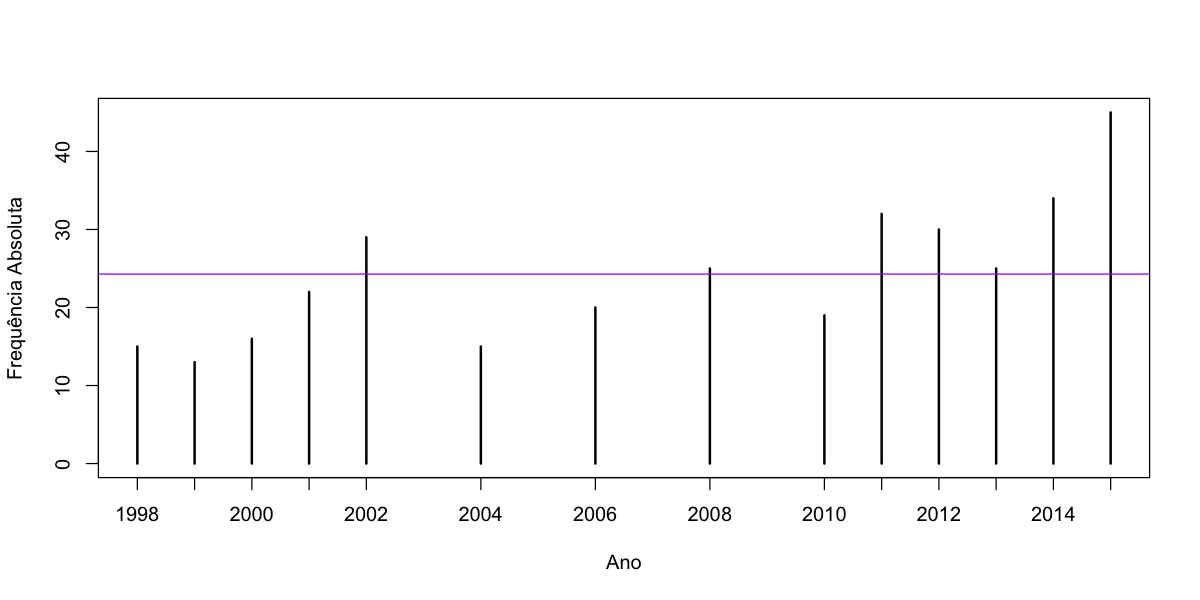

In [40]:
published.per.year = table(data.map[["artigo"]]$ano)
print(published.per.year)
avg.published = mean(published.per.year)
printf("Média de publicações: %.2f", avg.published)
plot(published.per.year, xlab = "Ano", ylab = "Frequência Absoluta")
abline(h = avg.published, col = "purple")

### 2   Quantos autores publicaram em cada edição do evento?


1998 1999 2000 2001 2002 2004 2006 2008 2010 2011 2012 2013 2014 2015 
  38   27   33   54   67   42   54   64   40   89   68   70  103  122 

    1998     1999     2000     2001     2002     2004     2006     2008 
2.533333 2.076923 2.062500 2.454545 2.310345 2.800000 2.700000 2.560000 
    2010     2011     2012     2013     2014     2015 
2.105263 2.781250 2.266667 2.800000 3.029412 2.711111 


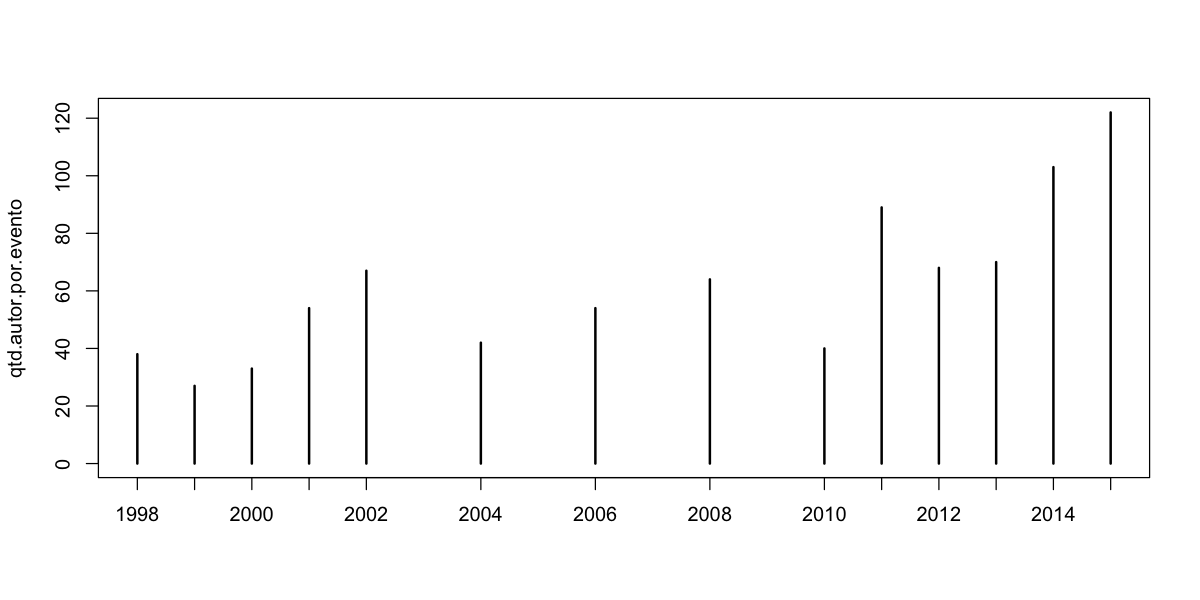

In [57]:
# Obtém os `datasets` de `artigo` e `autor`
artigo = data.map[["artigo"]]
autor = data.map[["autor"]]

# Faz o cruzamento de autores e artigos e remove duplicatas (i.e. autor que publicou mais de uma vez em um mesmo ano)
autor.by.artigo = merge(autor, artigo, by = "id_artigo")
autor.by.artigo = unique(data.frame(id_autor = autor.by.artigo$id_autor, ano = autor.by.artigo$ano))

# Exibe os resultados
qtd.autor.por.evento = table(autor.by.artigo$ano)
print(qtd.autor.por.evento)
plot(qtd.autor.por.evento)

#### 2.1 Qual a relação entre artigos e autores por evento?

Dado que temos as informações de quantos autores publicaram e quantos artigos foram publicados por evento, pode-se calcular a relação entre estas duas distribuições. Observa-se abaixo que esta relação permaneceu praticamente constante ao longo dos anos na faixa de 2.5, com pequena variação em torno dela.


    1998     1999     2000     2001     2002     2004     2006     2008 
2.533333 2.076923 2.062500 2.454545 2.310345 2.800000 2.700000 2.560000 
    2010     2011     2012     2013     2014     2015 
2.105263 2.781250 2.266667 2.800000 3.029412 2.711111 


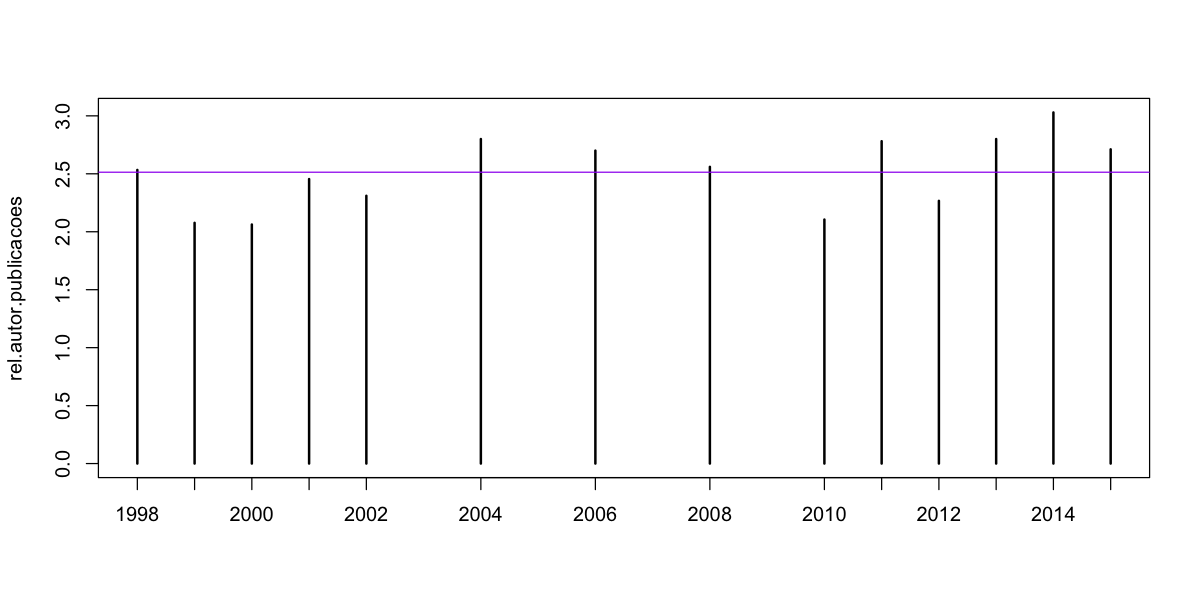

In [61]:
rel.autor.publicacoes = qtd.autor.por.evento/published.per.year
print(rel.autor.publicacoes)
plot(rel.autor.publicacoes)
abline(h = mean(rel.autor.publicacoes), col='purple')

### 3 Como o número de autores por artigo estão distribuídos a cada edição?

### 4 Como a proporção entre referências em português e em inglês tem variado ao longo dos anos?

### 5 Quais autores mais colaboram (publicam artigos em coautoria)?

### 6 Quais autores mais citam outros autores?

### 7 Quais autores têm maior proporção autocitação/citação?

### 8 Como são distribuídos os números de referências citados por cada artigo? Variam muito de edição para edição?

### 9 Quais conferências são mais citadas pelos artigos publicados no IHC (tipo de referência = C)? E quais periódicos (tipo de referência = J)?